* 데이터 셋
 - 서울시 사람들이 운동을 하지 않는 이유에 대한 설문
 - 서울 어느 위치에 운동시설을 만들면 건강한 서울이 될까?

In [11]:
import pandas as pd
df = pd.read_csv('data/report.txt', sep="\t")
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [12]:
df.describe()

,기간,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2019.0,46.267308,5.103846,4.655769,37.153846,5.163462
std,0.0,10.723709,2.211109,1.868145,8.666217,2.020001
min,2019.0,10.700000,0.400000,1.200000,17.900000,0.900000
25%,2019.0,42.775000,4.125000,3.300000,32.550000,4.075000
50%,2019.0,46.900000,4.850000,4.400000,35.850000,5.250000
75%,2019.0,52.100000,6.050000,5.700000,39.775000,6.250000
max,2019.0,69.800000,13.900000,9.900000,68.100000,10.900000


In [13]:
df.columns

Index(['기간', '대분류', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서',
       '운동을 할 만한 장소가 없어서', '운동을 싫어해서', '운동을 할 충분한 비용이 없어서', '기타'],
      dtype='object')

In [14]:
label = ['기간', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서',
        '운동을 싫어해서', '기타']
df.drop(labels = label, axis=1, inplace=True)

In [15]:
df

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
0,서울시,4.3,5.2
1,성별,4.9,4.9
2,성별,3.9,5.4
3,연령별,3.9,3.5
4,연령별,4.5,6.4
5,연령별,2.9,4.5
6,연령별,2.9,3.3
7,연령별,4.5,5.6
8,연령별,6.6,6.6
9,학력별,4.8,7.3


In [19]:
df_index = df[~df['대분류'].str.endswith('구')].index

In [20]:
df[df['대분류'].str.endswith("구")]

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
28,중구,7.7,7.6
29,용산구,4.9,2.7
30,성동구,5.7,8.7
31,광진구,3.0,5.8
32,동대문구,2.7,6.2
33,중랑구,6.8,10.9
34,성북구,2.6,2.0
35,강북구,3.4,1.9
36,도봉구,6.2,7.6


In [21]:
df_index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')

In [22]:
df.loc[df_index]

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
0,서울시,4.3,5.2
1,성별,4.9,4.9
2,성별,3.9,5.4
3,연령별,3.9,3.5
4,연령별,4.5,6.4
5,연령별,2.9,4.5
6,연령별,2.9,3.3
7,연령별,4.5,5.6
8,연령별,6.6,6.6
9,학력별,4.8,7.3


In [23]:
df.drop(df_index, inplace=True)

In [24]:
df

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
28,중구,7.7,7.6
29,용산구,4.9,2.7
30,성동구,5.7,8.7
31,광진구,3.0,5.8
32,동대문구,2.7,6.2
33,중랑구,6.8,10.9
34,성북구,2.6,2.0
35,강북구,3.4,1.9
36,도봉구,6.2,7.6


In [26]:
df['대분류'].duplicated().sum()

0

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", family = "Malgun Gothic")

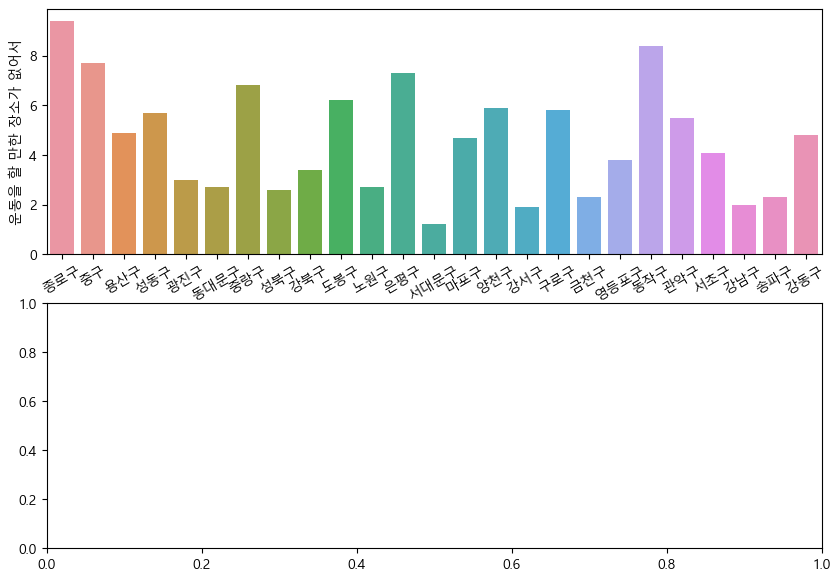

In [31]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
g = sns.barplot(x="대분류", y="운동을 할 만한 장소가 없어서", data = df, ax=ax[0]);
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

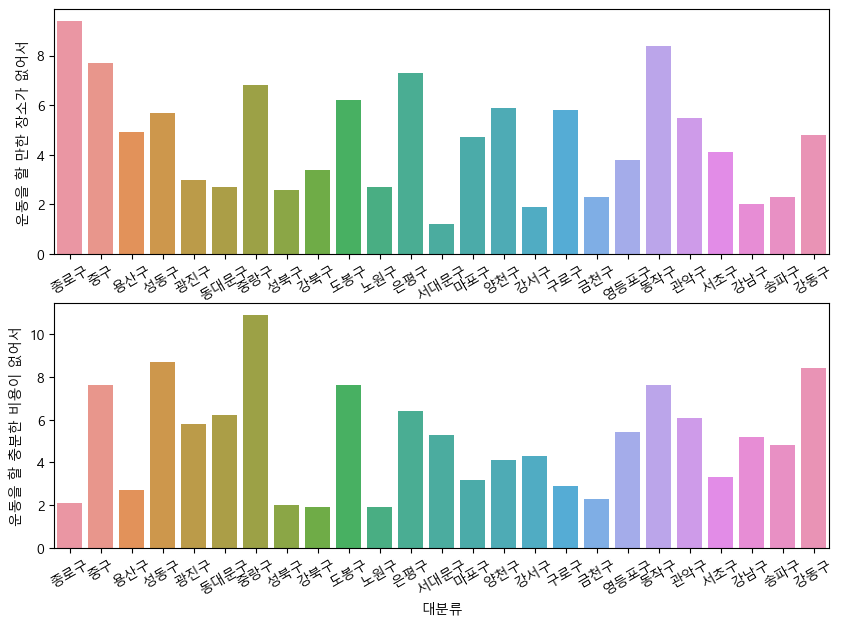

In [34]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
g = sns.barplot(x="대분류", y="운동을 할 만한 장소가 없어서", data = df, ax=ax[0]);
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g1 = sns.barplot(x="대분류", y="운동을 할 충분한 비용이 없어서", data=df, ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
plt.show()

In [44]:
df_sort = df.sort_values(by=['운동을 할 만한 장소가 없어서'],axis=0, ascending=False)

df_sort

,대분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
27,종로구,9.4,2.1
46,동작구,8.4,7.6
28,중구,7.7,7.6
38,은평구,7.3,6.4
33,중랑구,6.8,10.9
36,도봉구,6.2,7.6
41,양천구,5.9,4.1
43,구로구,5.8,2.9
30,성동구,5.7,8.7
47,관악구,5.5,6.1


In [47]:
df_sort.rename(columns = {df_sort.columns[0]:'분류', df_sort.columns[1]:'장소부족', df_sort.columns[2]:'비용부족'}, inplace=True)

In [48]:
df_sort.describe()

,장소부족,비용부족
count,25.000000,25.000000
mean,4.604000,5.068000
std,2.230187,2.473648
min,1.200000,1.900000
25%,2.700000,2.900000
50%,4.700000,5.200000
75%,5.900000,6.400000
max,9.400000,10.900000


1. MinMaxScaler
    * 모든 특성이 정확하게 0과 1사이에 위치하도록 한다
    * 가장 작은 값 0, 큰값은 1

In [52]:
from sklearn.preprocessing import MinMaxScaler

movie = {"daum" : [2,3,4,8,10], 'naver' : [1,2,3,4,5]}
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,3,2
2,4,3
3,8,4
4,10,5


In [55]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(mv)
min_max_mv = min_max_scaler.transform(mv)
min_max_mv

array([[0.   , 0.   ],
       [0.125, 0.25 ],
       [0.25 , 0.5  ],
       [0.75 , 0.75 ],
       [1.   , 1.   ]])

In [56]:
pd.DataFrame(min_max_mv, columns=['daum', 'naver'])

,daum,naver
0,0.000,0.00
1,0.125,0.25
2,0.250,0.50
3,0.750,0.75
4,1.000,1.00


In [59]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 27 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분류      25 non-null     object 
 1   장소부족    25 non-null     float64
 2   비용부족    25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [61]:
min_max_scaler = MinMaxScaler()
min_max_df = min_max_scaler.fit_transform(df_sort[['장소부족', '비용부족']])

In [62]:
min_max_df

array([[1.        , 0.02222222],
       [0.87804878, 0.63333333],
       [0.79268293, 0.63333333],
       [0.74390244, 0.5       ],
       [0.68292683, 1.        ],
       [0.6097561 , 0.63333333],
       [0.57317073, 0.24444444],
       [0.56097561, 0.11111111],
       [0.54878049, 0.75555556],
       [0.52439024, 0.46666667],
       [0.45121951, 0.08888889],
       [0.43902439, 0.72222222],
       [0.42682927, 0.14444444],
       [0.35365854, 0.15555556],
       [0.31707317, 0.38888889],
       [0.26829268, 0.        ],
       [0.2195122 , 0.43333333],
       [0.18292683, 0.        ],
       [0.18292683, 0.47777778],
       [0.17073171, 0.01111111],
       [0.13414634, 0.04444444],
       [0.13414634, 0.32222222],
       [0.09756098, 0.36666667],
       [0.08536585, 0.26666667],
       [0.        , 0.37777778]])

In [65]:
df_replace = pd.DataFrame(min_max_df, columns['장소부족', '비용부족'])
df_replace['분류'] = df_sort['분류'].values
df_replace.head()

NameError: name 'columns' is not defined

In [66]:
df_sort = df_replace[['분류', '장소부족','비용부족']]
df_sort.head()

NameError: name 'df_replace' is not defined

In [67]:
df_sort['종합점수'] = df_sort['장소부족']*0.6 + df_sort['비용부족']*0.4

In [68]:
df_sort

,분류,장소부족,비용부족,종합점수
27,종로구,9.4,2.1,6.48
46,동작구,8.4,7.6,8.08
28,중구,7.7,7.6,7.66
38,은평구,7.3,6.4,6.94
33,중랑구,6.8,10.9,8.44
36,도봉구,6.2,7.6,6.76
41,양천구,5.9,4.1,5.18
43,구로구,5.8,2.9,4.64
30,성동구,5.7,8.7,6.90
47,관악구,5.5,6.1,5.74


In [69]:
df_sort_top5 = df_sort.sort_values(by="종합점수", ascending=False).head()

In [70]:
df_sort_top5

,분류,장소부족,비용부족,종합점수
33,중랑구,6.8,10.9,8.44
46,동작구,8.4,7.6,8.08
28,중구,7.7,7.6,7.66
38,은평구,7.3,6.4,6.94
30,성동구,5.7,8.7,6.90


<Axes: xlabel='분류', ylabel='종합점수'>

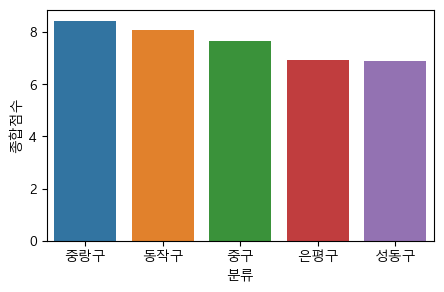

In [71]:
plt.subplots(figsize=(5,3))
sns.barplot(x="분류", y="종합점수", data = df_sort_top5)